## 결정 트리 분류기 훈련하기

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [2]:
# 데이터 로드

iris=datasets.load_iris()
features=iris.data
target=iris.target

In [3]:
# 결정틜 분류기 생성

decisiontree=DecisionTreeClassifier(random_state=0)

In [8]:
# 모델 훈련

model=decisiontree.fit(features,target)

결정트리 학습기는 노드에서 불순도(impurity)가 가장 크게 감소하는 결정 규칙을 찾는다.

불순도를 측정하는 방법은 여러가지가 있지만, DecisionTreeClassifier 는 기본적으로 지니 불순도(Gini Impurity)를 사용한다.

불순도를 낮추는 결정 규칙을 찾는 과정은 모든 리프노드가 순수해지거나 어떤 임계값에 도달할 때까지 반복된다.

In [9]:
# 모델의 훈련과정 확인하기

observation=[[5,4,3,2]] # 새로운 샘플

In [10]:
# 샘플의 클래스 예측

model.predict(observation)

array([1])

In [11]:
# 샘플의 클래스 예측 확률 확인

model.predict_proba(observation)

array([[0., 1., 0.]])

In [12]:
# 다른 불순도 지표를 사용하고 싶을때, criterion 매개변수 사용

decisiontree_entropy=DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
# 모델 훈련

model_entropy=decisiontree_entropy.fit(features,target)

#### 지니 불순도는 클래스가 균등하게 분포되어 있을 때 최대가 된다.

예를 들어, 이진 클래스일 경우 클래스 샘플 비율이 0.5 일때 가장 큰 값ㅇ ㅣ된다.

G(t)=1-0.5^2-0.5^2=0.5



#### 엔트로피 불순도도 클래스가 균드앟게 분포되어 있을 때 최대가 된다.

H(t)=-0.5*log2(0.5)-0.5*log2(0.5)=1

## 결정 트리 회귀 훈련하기

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

In [16]:
boston=datasets.load_boston()
features=boston.data[:,0:2]
target=boston.target

In [17]:
decisiontree=DecisionTreeRegressor(random_state=0)

In [18]:
model=decisiontree.fit(features,target)

In [19]:
# 결정트리의 모델 훈련 과정 확인

observation=[[0.02,16]]

In [20]:
# 샘플의 타깃 예측

model.predict(observation)

array([33.])

criterion 매개변수를 사용하여 분할 품질의 측정 방식을 선택할 수 있다.

In [21]:
decisiontree_mae=DecisionTreeRegressor(criterion='mae', random_state=0)

In [22]:
# 모델 훈련

model_mae=decisiontree_mae.fit(features, target)

## 결정 트리 모델 시각화하기

In [26]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

In [27]:
iris=datasets.load_iris()
features=iris.data
target=iris.target

In [28]:
# 결정 트리 분류기 생성

decisiontree=DecisionTreeClassifier(random_state=0)

In [29]:
# 모델 훈련

model=decisiontree.fit(features,target)

In [39]:
# DOT 데이터 생성

dot_data=tree.export_graphviz(decisiontree, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names)

# 그래프 생성

graph=pydotplus.graph_from_dot_data(dot_data)

# 그래프 출력

Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [40]:
import matplotlib.pyplot as plt

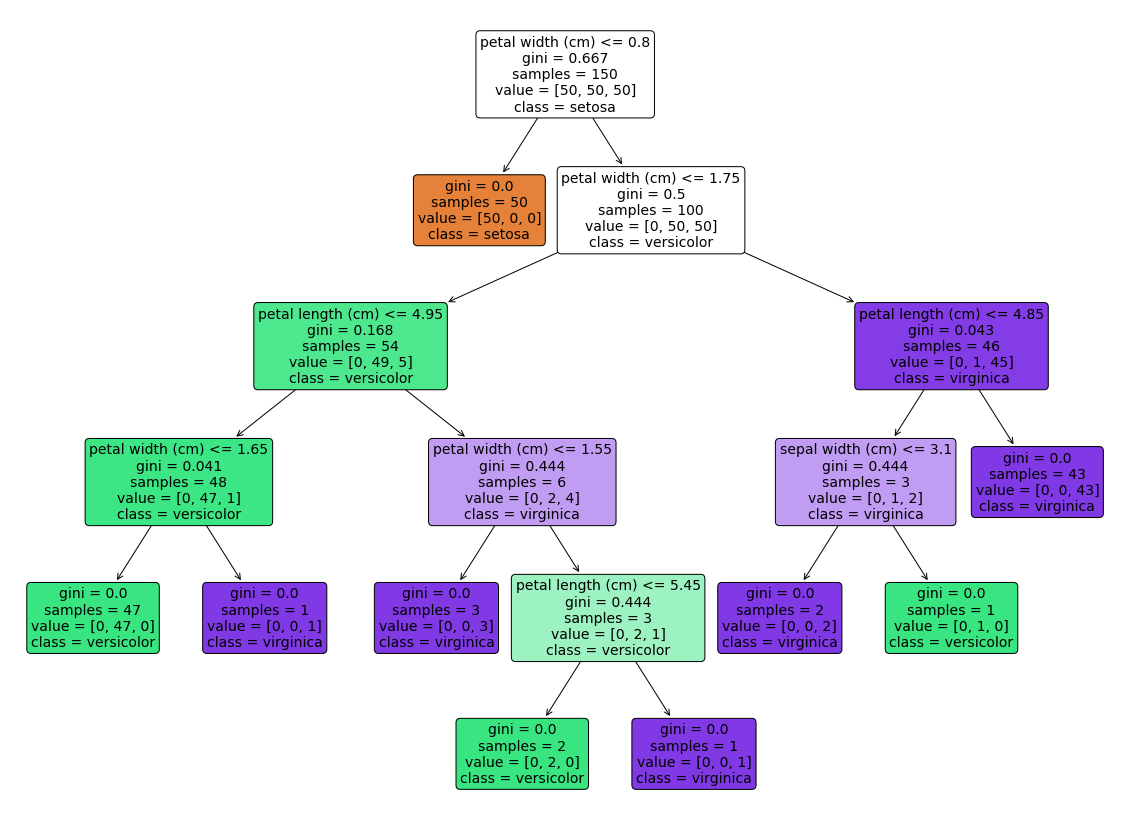

In [42]:
plt.figure(figsize=(20,15))
tree.plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True, fontsize=14)
plt.show()

## 랜덤 포레스트 분류기 훈련하기

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [44]:
iris=datasets.load_iris()
features=iris.data
target=iris.target

In [45]:
# 랜덤 포레스트 분류기 객체 생성

randomforest=RandomForestClassifier(random_state=0, n_jobs=-1)

In [46]:
# 모델 훈련

model=randomforest.fit(features, target)

결정트리의 일반적인 문제는 훈련 데이터에 너무 가깝게 맞추려는 (과대적합) 하려는 성질이 있다는 것이다.

이 때문에 랜덤 포레스트라 불리는 앙상블 방법이 널리 사용된다.

랜덤 포레스트는 많은 결정트리를 훈련하지만 각 트리는 부트스트랩 샘플을 사용한다.

-> 즉, 원본 샘플 수와 동일하게 중복을 포함하여 랜덤하게 샘플을 뽑는다.

또 각 노드는 최적의 분할을 결정할 때 특성의 일부만 사용한다.

이 랜덤한 결정 트리의 숲이 투표하여 예측 클래스를 결정한다.

In [54]:
# 랜덤포레스트는 결정트리와 작동 방식이 비슷하다.

observation=[[5,4,3,2]]

model.predict(observation)

array([1])

In [55]:
# 랜덤포레스트는 결정트리처럼 불순도 측정 방식을 바꿀 수 있다.

randomforest_entropy=RandomForestClassifier(criterion='entropy', random_state=0)

In [56]:
# 모델 훈련

model_entropy=randomforest_entropy.fit(features,target)

개별 결정트리가 아니ㅏ므로 RandomForestClassifier 에만 있거나 특별히 중요한 매개변수가 있다.

- max_features : 각 노드에서 사용할 특성의 최대 개수를 결정한다. 이 매개변수는 정수(특성의 수), 실수(특정 개수 비율), sqrt(특성 개수의 제곱근)을 입력할 수 있다. Default 값은 auto 로 sqrt와 동작이 같다.

- bootstrap : 트리에 사용할 샘플을 중복을 허용한 샘플리으로 만들지(기본값) 아닐지를 결정한다.

- n_estimators : 랜덤 포레스트에서 만들 결정 트리 개수를 지정한다.

- n_jobs : 많은 결정 트리를 만들때 코어를 모두 사용해 효율적이게 구성하는것이 좋다.

## 랜덤 포레스트 회귀 훈련하기

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

In [59]:
boston=datasets.load_boston()
features=boston.data[:,0:2]
target=boston.target

In [62]:
# 랜덤 포레스트 회귀 객체 생성

randomforest=RandomForestRegressor(random_state=0, n_jobs=-1, verbose=1)

In [63]:
# 모델 훈련

model=randomforest.fit(features, target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


랜덤포레스트 분류기와 마찬가지로 중요한 매개변수들이 있다.

- max_features : 각 노드에서 사용할 최대 특성 개수
- bootstrap : 중복을 허용한 샘플링 여부  (기본값 : True)
- n_estimators : 사용할 결정 트리 개수 (기본값 : 100)

## 랜덤 포레스트에서 중요한 특성 구분하기

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [71]:
# 데이터 로드

iris=datasets.load_iris()
features=iris.data
target=iris.target

features.shape

(150, 4)

In [72]:
# 랜덤 포레스트 분류기 객체 생성

randomforest=RandomForestClassifier(random_state=0, n_jobs=-1, verbose=1)

In [73]:
# 모델 훈련

model=randomforest.fit(features, target)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [74]:
# 특성 중요도 계산

importances=model.feature_importances_
importances

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

In [76]:
# 특성 중요도를 내림차순으로 정렬

indices=np.argsort(importances)[::-1]
indices

array([2, 3, 0, 1], dtype=int64)

In [78]:
# 정렬된 특성 중요도에 따라 특성의 이름 나열

names=[iris.feature_names[i] for i in indices]
names

['petal length (cm)',
 'petal width (cm)',
 'sepal length (cm)',
 'sepal width (cm)']

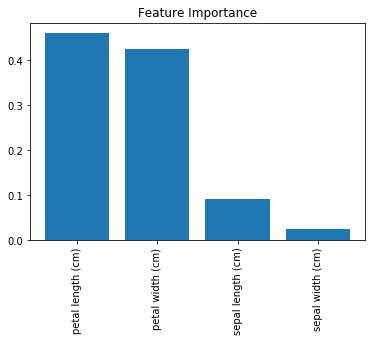

In [80]:
# 그래프 생성

plt.figure()
plt.title("Feature Importance")

# 막대 그래프 추가
plt.bar(range(features.shape[1]), importances[indices])

# x축 레이블로 특성 이름을 사용
plt.xticks(range(features.shape[1]), names, rotation=90)

# 그래프 출력
plt.show()

결정 트리의 주요 장점은 해석이 용이하다는 것이다.

그러나 랜덤포레스트는 수십, 수백, 수천개의 결정트리를 그리기 때문에 직관적으로 모델을 시각화하기가 어렵다.

따라서, 각 특성의 상대적 중요도를 비교하는 방법으로 시각화를 하고 있다.


특성 중요도에 관해서는 두가지를 유념해야 한다.



1) 사이킷런에서는 순서가 없는 범주형 특성을 여러 개의 이진 특성으로 변환해야 한다. 특성의 중요도 또한 여러 개의 이진 특성으로 나뉘게 된다.    원본 범주형 특성이 아주 중요하더라도 개별 이진 특성은 중요하지 않게 보일 수 있다.

2) 두 특성의 상관관계가 있다면 한 특성이 중요하게 나타났을때 다른 특성은 중요하지 않게 보일 수도 있다.

In [81]:
# 특성 중요도 확인

model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

값이 클수록 더 중요한 특성이며 이는 곧 불순도를 가장 낮추는 특성이라는 뜻이다.

각 특성의 합은 1이다.

랜덤 포레스트의 특성 중요도는 결정 트리의 중요도를 특성별로 평균하여 특성 중요도를 구한다.

최종적으로 특성 중요도가 합이 1이 되도록 정규화하며, 한 특성에 치우치지 않고 데이터의 다양한 면을 바라본다는것이 특징이다.

In [82]:
# 결정 트리 분류기

decisiontree=DecisionTreeClassifier(random_state=0,)

In [83]:
# 모델 훈련

model=decisiontree.fit(features,target)

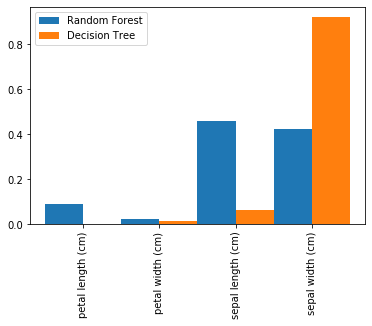

In [84]:
# 랜덤 포레스트와 결정 트리의 특성 중요도 비교

fig, ax=plt.subplots()
rects1= ax.bar(np.arange(features.shape[1])-0.25,
              randomforest.feature_importances_,0.5,
              label='Random Forest')
rects2=ax.bar(np.arange(features.shape[1])+0.25,
             model.feature_importances_,0.5,
             label='Decision Tree')
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.legend()
plt.show()

결정트리와 달리 랜덤포레스트는 특정 특성에 치우치지 않고, 다양한 특성을 고려함을 볼 수 있다.

## 랜덤 포레스트에서 중요한 특성 선택하기

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

In [86]:
iris=datasets.load_iris()
features=iris.data
target=iris.target

In [87]:
# 랜덤 포레스트 분류기 생성

randomforest=RandomForestClassifier(random_state=0, n_jobs=-1)

In [88]:
# 특성 중요도가 임계값보다 크거나 같은 특성으로 객체 생성

selector=SelectFromModel(randomforest, threshold=0.3)

In [89]:
# selector를 사용하여 새로운 특성 행렬 생성

features_important=selector.fit_transform(features, target)

In [90]:
# 가장 중요한 특성을 사용하여 랜덤 포레스트 모델 훈련

model=randomforest.fit(features_important, target)

모델의 특성 개수를 감소시켜야 할 경우가 있다.

사이킷런에서는 두 단계의 워크플로를 사용하여 줄어든 특성으로 모델을 만들 수 있다.

1) 모든 특성을 사용해 랜덤 포레스트 모델을 훈련한다.
2) 그다음 중요한 특성만 포함된 새로운 특성 행렬을 만들어 새 모델을 훈련한다.

그러나, 이 방식에도 문제는 존재한다.

1. 원-핫 인코딩된 순서가 없는 범주형 특성의 특성 중요도는 여러 개의 이진 특성으로 희석된다.
2. 상관관계가 높은 특성의 중요도는 양쪽 특성에 고루 분산되는 것이 아니라 한 특성에 집중된다.

## 불균형한 클래스 다루기

In [91]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [92]:
iris=datasets.load_iris()
features=iris.data
target=iris.target

In [93]:
# 처음 40개의 샘플을 제거하여 불균형한 데이터를 만든다.

features=features[40:,:]
target=target[40:]

In [94]:
# 0인 클래스 이외에는 모두 1인 타깃 벡터를 만든다.

target=np.where((target==0),0,1)

In [96]:
# 랜덤 포레스트 분류기 객체를 만든다.

randomforest=RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced')

RandomForestClassifier 클래스의 class_weighted 매개변수를 사용하여 불균형한 클래스를 교정할 수 있다.

클래스 이름과 원하는 상대적 가중치를 딕셔너리(ex: {'male':0.2,'female':0.8} ) 로 만들어 주입하면

그에 따라 RandomForestClassifier 가 클래스에 가중치를 부여한다.


좀 더 유용한 매개변수값은 'balanced' 이다. 이 옵션은 데이터에 등장한 비율의 역수로 클래스 가중치를 자동으로 부여한다.

In [97]:
# 작은 클래스의 가중치 계산

110/(2*10)

5.5

In [98]:
# 큰 크래스의 가중치 계산

110/(2*100)

0.55

## 트리 크기 제어하기

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [100]:
# 데이터 로드

iris=datasets.load_iris()
features=iris.data
target=iris.target

In [101]:
# 결정트리 분류기 생성

decisiontree=DecisionTreeClassifier(random_state=0,
                                   max_depth=None,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   min_weight_fraction_leaf=0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0)

In [102]:
# 모델 훈련

model=decisiontree.fit(features, target)

#### 사이킷런의 트리 기반 학습 알고리즘의 매개변수

- max_depth : 트리의 최대깊이. None 이면 불순도가 0이 될때까지 트리가 성장한다.
- min_samples_split : 노드를 분할하기 위한 최소 샘플 개수. 정수가 입력되면 최솟값으로 사용ㅇ된다. 실수가 입력되면 전체 샘플 개수의 비율을 의미한다.
- min_samples_leaf : 리프 노드가 되기 위한 최소 샘플 개수. min_samples_split 과 동일한 매개변수값을 사용한다.
- max_leaf_nodes : 리프 노드의 최대 개수
- min_impurity_split : 분할하기 위한 불순도 최소 감소량


대부분 max_depth 와 min_impurity_split 만 사용하기는 한다. 얕은 트리로 만든 모델이 간단하고 분산이 낮기 때문이다.

트리기반 모델에서 과대적합을 막는 방법은 트리의 성장을 제한하는 것이다.

트리가 모두 성장한 후 노드를 줄이는 방법을 '사후 가지치기(post-pruning)' 라고 하고, 성장하기 전에 막는 방법을 '사전 가지치기(pre-pruning)' 이라고 한다.

사이킷런 사전 가지치기만 지원한다.


트리 모델에서 과대적합을 줄이려면 min_ 으로 시작하는 매개변수값을 증가시키거나 max_ 로 시작하는 매개변수값을 줄이면 된다.

## 부스팅을 사용하여 성능 향상하기

In [103]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

In [104]:
iris=datasets.load_iris()
features=iris.data
target=iris.target

In [105]:
# 에이다부스트 트리 분류기의 객체 생성

adaboost=AdaBoostClassifier(random_state=0)

In [106]:
# 모델 훈련

model=adaboost.fit(features, target)

랜덤 포레스트에서 랜덤한 결정 트리의 앙상블이 타깃 벡터를 예측한다.

에이다부스트(Adaboost)로 부르는 부스팅 형식은 이전 모델이 잘못 예측한 샘플에 높은 우선순위를 부여하는 식으로

약한 모델을 연속적으로 훈련한다. 구체적인 모델의 훈련과정은 다음과 같다.



1. 모든 샘플 Xi 에 초기 가중치 값 Wi=1/n 을 할당한다. 여기서 n 은 전체 데이터 샘플의 갯수이다.

2. 이 데이터에서 약한 모델을 훈련한다.

3. 각 샘플에 대하여 모델이 Xi를 올바르게 예측하면 Wi를 낮추고, 잘못 예측하면 Wi를 높인다.

4. Wi가 큰 샘플에 높은 우선순위를 두는 새로운 약한 모델을 훈련한다.

5. 데이터가 완벽하게 예측되거나 지정된 개수만큼 모델을 훈련할 때까지 단계 4와 5를 반복한다.

최종 결과는 더 어려운 샘플에 초점을 맞추는 약한 모델들을 모은 앙상블 모델이다.

사이킷런에는 AdaBoostClassifier 와 AdaBoostRegressor 클래스에 에이다부스트가 구현되어 있다.

중요한 매개변수는 다음과 같다.

- base_estimator : 약한 모델을 훈련하는데 사용할 학습 알고리즘이다. 기본값은 트리 이다.
- n_estimators : 반복적으로 훈련할 모델의 개수이다.
- learning_rate : 각 모델이 부여하는 가중치 정도로 기본값은 1이다. 학습률을 감소하면 가중치 감소나 증가량이 줄어들기 때문에 모델의 훈련 속도를 느리게 만든다( 하지만 이따금 더 나은 성능을 만든다 )
- loss : AdaBoostRegressor 에만 해당되는 것으로 가중치를 업데이트할 때 사용하는 손실함수(loss function)을 지정한다. 기본값은 선형 손실함수이지만 square 나 exponential 로 바꿀 수 있다.

AdaBoostClassifier 는 깊이가 1인 분류용 결정 트리 DecisionTreeClassifier(max_depth=1) 을 사용하고

AdaBoostRegressor 는 깊이가 3인 회귀용 결정 트리 DecisionTreeRegressor(max_depth=3) 을 사용한다.



AdaBoostClassifier 에서 예측할 때는 각 학습기ㅔ 부여된 가중치를 더하여 가장 높은 점수의 클래스가 예측 결과가 된다.
개별 학습기의 가중치는 샘플 가중치를 고려한 예측 정확도를 기반으로 계산된다.


AdaBoostRegressor 의 예측은 개별 학습기의 결과를 정렬하여 예측기 가중치의 누적값이 중간 지점에 있는 결과를 사용한다.


그레이디언트 부스팅 (Gradient Boosting)은 에이다부스트와는 달리 이전 학습기가 만든 잔여 오차에 새로운 트리를 훈련하는 방식으로
앙상블 모델을 구성하여 높은 성능을 낸다.

GradientBoostingClassifier 와 GradientBoostingRegressor 는 모두 깊이가 3이고, criterion이 'friedman_mse' 인 DecisionTreeRegressor를 사용한다.

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
# 그레이디언트 부스팅 분류기이 객체 생성

gradientboost=GradientBoostingClassifier(random_state=0)

In [109]:
# 모델 훈련

model=gradientboost.fit(features, target)

현재 가장 인기가 많은 머신러닝 알고리즘 중 하나는 XGBoost, LightGBM 과 같은 라이브러리에 구현된
히스토그램 기반의 그레이디언트 부스팅이다.

히스토그램 기반의 그레이디언트 부스팅의 종류로 HistGradientBoostingClassifier 와 HistGradientBoostingRegressor 도 있는데,
이 알고리즘은 훈련 데이터를 정수 구간(bin)으로 변환한 후 훈련하기 떄문에 일반적인 그래디언 부스팅보다 훨씬 빠르다.

구간의 최대 개수를 지정하는 max_bins 의 기본값은 256이며, 이보다 크게 지정할 수는 없다.

이 클래스들은 아직 실험적이기 때문에, 명시적을 사용한다는것을 선언해야 한다.

In [110]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [111]:
# 히스토그램 기반의 그레이디언트 부스팅 분류기의 객체 생성

histgradientboost=HistGradientBoostingClassifier(random_state=0)

In [112]:
model=histgradientboost.fit(features, target)

## OOB 데이터로 랜덤 포레스트 평가하기
### 교차검증을 사용하지 않고 랜덤 포레스트 모델 평가하기 -> OOB 점수를 계산하여 해결

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [114]:
iris=datasets.load_iris()
features=iris.data
target=iris.target

In [115]:
# 랜덤 포레스트 분류기 객체 생성

randomforest=RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=1000, oob_score=True)  # 사용할 결정트리 1000개

In [116]:
# 모델 훈련

model=randomforest.fit(features, target)

In [117]:
# OOB 오차 확인

randomforest.oob_score_

0.9533333333333334

랜덤 포레스트에서 각 결정트리는 부트스트랩 샘플을 사용하여 훈련된다.

즉 모든 트리는 서로 다른 일부 샘플을 훈련에 사용하지 않으며 이를 OOB 샘플이라 부른다.
OOB 샘픙르 테스트 세트처럼 사용하여 랜덤 포레스트의 성능을 평가할 수 있다.

특정 샘플을 사용하여 훈련되지 않은 트리를 통해 학습 알고리즘은 해당 샘플의 정답과 예측값을 비교한다.

전체 점수를 계산하여 랜덤 포레스트의 성능을 측정한다. OOB점수는 교차검증(cross_val)을 대신할 수 있는 방법이다.

사이킷런에서 OOB 점수를 계산하려면 랜덤포레스트 클래스의 객체를 oob_score=True 로 지정하여 초기화한다.

이 점수는 oob_score_ 속성에 저장되어 있다.

In [118]:
'''
랜덤 포레스트와 비슷하게 부트스트랩 샘플링을 사용하는 배깅(Bagging)도 OOB 점수를 계산할 수 있다
배깅은 BaggingClassifier 와 BaggingRegressor 에 구현되어 있다.
BaggingClassifier로 결정 트리의 앙상블을 만드려면 DecisionTreeClassifier 객체를 만들어 직접 전달해야 한다
'''

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [120]:
# 배깅 분류기의 객체 생성

bagging=BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=0, n_jobs=-1, oob_score=True, verbose=1)

In [121]:
# 모델 훈련

model=bagging.fit(features,target)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.7s finished


In [122]:
# OOB 오차 확인

model.oob_score_

0.96